<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Tejas/DeepLearning_HW1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 3 Dropout

In [20]:
#Path: TensorFlow/Tejas/
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import keras
import keras.utils
from keras import utils as np_utils
%matplotlib inline  

Found GPU at: /device:GPU:0


In [21]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


In [22]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.8154721180000024
GPU (s):
0.041225295000003825
GPU speedup over CPU: 68x


In [23]:
# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [24]:
# Lets see the shapes of each Data sets
print("TRAIN SET:")
print("Training Set X_train shape is : {}".format(X_train.shape))
print("Training Set y_train shape is : {}".format(y_train.shape))
print("____"*25)
print("TEST SET:")
print("Test Set X_test shape is : {}".format(X_test.shape))
print("Test Set y_test shape is : {}".format(y_test.shape))

TRAIN SET:
Training Set X_train shape is : (60000, 28, 28)
Training Set y_train shape is : (60000,)
____________________________________________________________________________________________________
TEST SET:
Test Set X_test shape is : (10000, 28, 28)
Test Set y_test shape is : (10000,)


In [25]:
# One way of flattening input, chose this I faced many issues with input shapes while doing it inside the model
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784) 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [26]:
import keras
num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [67]:
def define_model_no_drop(act_fxn,init):
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1024, input_shape=(28*28,), activation=act_fxn, kernel_initializer=init),
    tf.keras.layers.Dense(units=1024, activation=act_fxn),
    tf.keras.layers.Dense(units=1024, activation=act_fxn),
    tf.keras.layers.Dense(units=1024, activation=act_fxn),
    tf.keras.layers.Dense(units=1024, activation=act_fxn),
    tf.keras.layers.Dense(units=10, activation="softmax")
  ])
  return model 

In [68]:
normal_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
xavier_ini_normal = tf.keras.initializers.GlorotNormal()
xavier_initializer = tf.keras.initializers.GlorotUniform()
he_initializer = tf.keras.initializers.HeNormal()

In [69]:
from keras.models import Sequential
from keras.layers import  Dense, Dropout, Activation, Flatten

In [70]:
model1 = define_model_no_drop(act_fxn= 'sigmoid',init =xavier_ini_normal )


model3 = define_model_no_drop(act_fxn= 'relu',init = he_initializer)

In [71]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28*28,)),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10,kernel_initializer=xavier_initializer)
])



In [72]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28*28,)),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1024,activation='relu',kernel_initializer=he_initializer),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10,kernel_initializer=he_initializer)
])

In [34]:
adam = tf.keras.optimizers.Adam()

In [ ]:

model1.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics=["accuracy"])
history1 = model1.fit(X_train,y_train,epochs=200,batch_size=128,verbose=True,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 2.3752 - accuracy: 0.1023 - val_loss: 2.3113 - val_accuracy: 0.1010
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 2.3063 - accuracy: 0.1040 - val_loss: 2.3055 - val_accuracy: 0.1135
Epoch 3/200
469/469 [==============================] - 3s 6ms/step - loss: 2.3045 - accuracy: 0.1059 - val_loss: 2.3032 - val_accuracy: 0.1135
Epoch 4/200
469/469 [==============================] - 3s 6ms/step - loss: 2.3033 - accuracy: 0.1078 - val_loss: 2.3032 - val_accuracy: 0.1010
Epoch 5/200
469/469 [==============================] - 2s 5ms/step - loss: 2.3028 - accuracy: 0.1085 - val_loss: 2.3036 - val_accuracy: 0.1028
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 2.3025 - accuracy: 0.1098 - val_loss: 2.3027 - val_accuracy: 0.1135
Epoch 7/200
469/469 [==============================] - 2s 5ms/step - loss: 2.3024 - accuracy: 0.1089 - val_loss: 2.3019 - val_accuracy: 0.1135

In [50]:

model2.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics=["accuracy"])
history2 = model2.fit(X_train,y_train,epochs=200,batch_size=128,verbose=True,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 4s 6ms/step - loss: 6.6910 - accuracy: 0.0979 - val_loss: 8.3605 - val_accuracy: 0.0980
Epoch 2/200
469/469 [==============================] - 3s 6ms/step - loss: 8.3129 - accuracy: 0.0984 - val_loss: 8.3605 - val_accuracy: 0.0980
Epoch 3/200
469/469 [==============================] - 3s 6ms/step - loss: 8.3086 - accuracy: 0.0978 - val_loss: 8.3605 - val_accuracy: 0.0980
Epoch 4/200
469/469 [==============================] - 2s 5ms/step - loss: 8.3118 - accuracy: 0.0970 - val_loss: 8.3605 - val_accuracy: 0.0980
Epoch 5/200
469/469 [==============================] - 2s 5ms/step - loss: 8.3083 - accuracy: 0.0991 - val_loss: 8.3605 - val_accuracy: 0.0980
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 8.3110 - accuracy: 0.0972 - val_loss: 8.3605 - val_accuracy: 0.0980
Epoch 7/200
469/469 [==============================] - 2s 5ms/step - loss: 8.3043 - accuracy: 0.0993 - val_loss: 8.3605 - val_accuracy: 0.0980

In [52]:

model3.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics=["accuracy"])
history3 = model3.fit(X_train,y_train,epochs=200,batch_size=128,verbose=True,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.1186 - val_accuracy: 0.9802
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.1103 - val_accuracy: 0.9775
Epoch 3/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.1096 - val_accuracy: 0.9799
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0143 - accuracy: 0.9961 - val_loss: 0.1133 - val_accuracy: 0.9809
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 0.1210 - val_accuracy: 0.9787
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.1094 - val_accuracy: 0.9795
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.1531 - val_accuracy: 0.9781

In [53]:

model4.compile(optimizer=adam, loss= 'categorical_crossentropy', metrics=["accuracy"])
history4 = model4.fit(X_train,y_train,epochs=200,batch_size=128,verbose=True,validation_data=(X_test,y_test))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 8.0234 - accuracy: 0.1039 - val_loss: 7.9301 - val_accuracy: 0.1135
Epoch 2/200
469/469 [==============================] - 2s 5ms/step - loss: 8.0564 - accuracy: 0.1072 - val_loss: 7.9301 - val_accuracy: 0.1135
Epoch 3/200
469/469 [==============================] - 2s 5ms/step - loss: 8.0072 - accuracy: 0.1075 - val_loss: 7.9301 - val_accuracy: 0.1135
Epoch 4/200
469/469 [==============================] - 2s 5ms/step - loss: 8.0497 - accuracy: 0.1066 - val_loss: 7.9301 - val_accuracy: 0.1135
Epoch 5/200
469/469 [==============================] - 2s 5ms/step - loss: 8.0002 - accuracy: 0.1056 - val_loss: 7.9301 - val_accuracy: 0.1135
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 8.0671 - accuracy: 0.1067 - val_loss: 7.9301 - val_accuracy: 0.1135
Epoch 7/200
469/469 [==============================] - 2s 5ms/step - loss: 8.0717 - accuracy: 0.1057 - val_loss: 7.9301 - val_accuracy: 0.1135

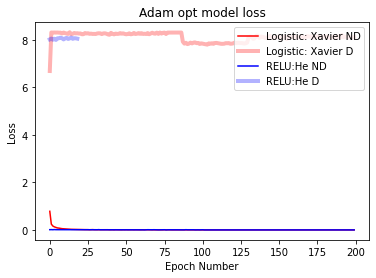

In [66]:
plt.plot(history1.history['loss'], color = 'red')
plt.plot(history2.history['loss'], color='red',linewidth=4.0,alpha=0.3)
plt.plot(history3.history['loss'], color = 'blue')
plt.plot(history4.history['loss'],color='blue',linewidth=4.0,alpha=0.3)

plt.title('Adam opt model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.legend(['Logistic: Xavier ND', 'Logistic: Xavier D', 'RELU:He ND','RELU:He D'], loc='upper right')
plt.show()

In [65]:
print(history2.history['val_loss'])


[8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513000488, 8.360455513